# 💰 Prediksi Pendapatan Individu (>50K atau <=50K) Menggunakan Machine Learning

## 📘 Deskripsi Dataset
Dataset ini berisi informasi demografis dan pekerjaan seseorang, seperti:
- Umur, jenis pekerjaan, tingkat pendidikan, status pernikahan, jenis kelamin, jam kerja per minggu, dll.
- Target: **income** → apakah pendapatan individu >50K USD per tahun (`>50K`) atau tidak (`<=50K`)

---

## ⚙️ Langkah Preprocessing

1. **Pembersihan Target:**
   - Nilai `income` seperti `<=50K.` diubah menjadi `<=50K` (hapus titik).

2. **Penanganan Nilai Hilang:**
   - Kolom kategori `workclass`, `occupation`, dan `native-country` yang memiliki missing values diisi dengan modus (nilai terbanyak).

3. **One-Hot Encoding:**
   - Semua kolom kategori (string) dikonversi menjadi fitur numerik menggunakan teknik one-hot encoding.

4. **Split Dataset:**
   - Data dibagi menjadi 80% pelatihan dan 20% pengujian secara stratified (proporsi target seimbang).

5. **Standardisasi:**
   - Fitur dinormalisasi dengan `StandardScaler` untuk membantu konvergensi model boosting dan stabilitas model.

---

## 🤖 Model Machine Learning

### 1. Random Forest Classifier (Bagging)
- Menggunakan banyak decision tree dengan pendekatan bootstrapping (sampling acak)
- Voting mayoritas untuk hasil akhir
- Kuat terhadap overfitting

### 2. Gradient Boosting Classifier (Boosting)
- Menggabungkan banyak model lemah secara berurutan
- Setiap model fokus memperbaiki kesalahan model sebelumnya
- Presisi tinggi untuk data tabular kompleks

---

## 📊 Evaluasi Model

### Metrik Evaluasi:
- **Accuracy**: Seberapa sering model membuat prediksi yang benar
- **Precision**: Seberapa akurat model dalam memprediksi pendapatan >50K
- **Recall**: Kemampuan model dalam menemukan semua individu dengan pendapatan >50K
- **F1 Score**: Harmonik antara Precision dan Recall
- **AUC (Area Under Curve)**: Kemampuan model membedakan antara kelas 0 dan 1 secara umum

---

## 📈 ROC Curve
- ROC (Receiver Operating Characteristic) menunjukkan hubungan antara True Positive Rate (Recall) dan False Positive Rate
- Area di bawah kurva (AUC) semakin mendekati 1 → model semakin baik

---

## 🔲 Confusion Matrix
- Matriks 2x2 yang menunjukkan jumlah prediksi benar dan salah:
  - True Positive (TP): Model memprediksi >50K dan benar
  - True Negative (TN): Model memprediksi <=50K dan benar
  - False Positive (FP): Salah prediksi >50K
  - False Negative (FN): Salah prediksi <=50K

---


/tmp/ipython-input-1-273014846.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)



=== Random Forest (Bagging) ===
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7431
           1       0.73      0.62      0.67      2338

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769

AUC: 0.9043

=== Gradient Boosting (Boosting) ===
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7431
           1       0.79      0.61      0.69      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

AUC: 0.9241


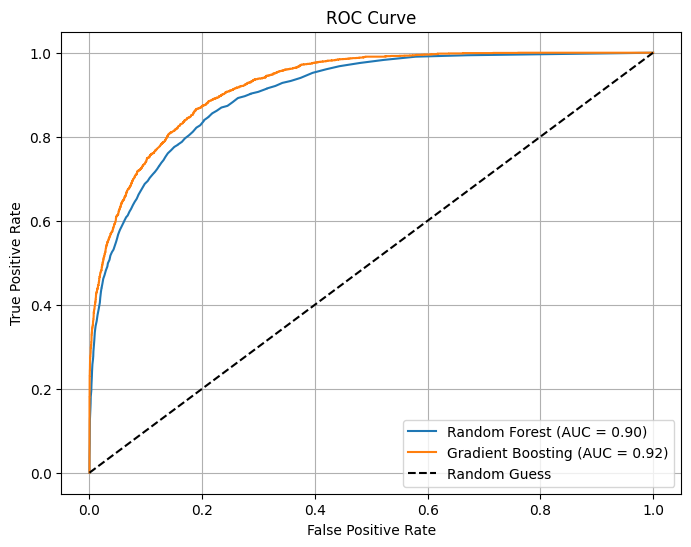

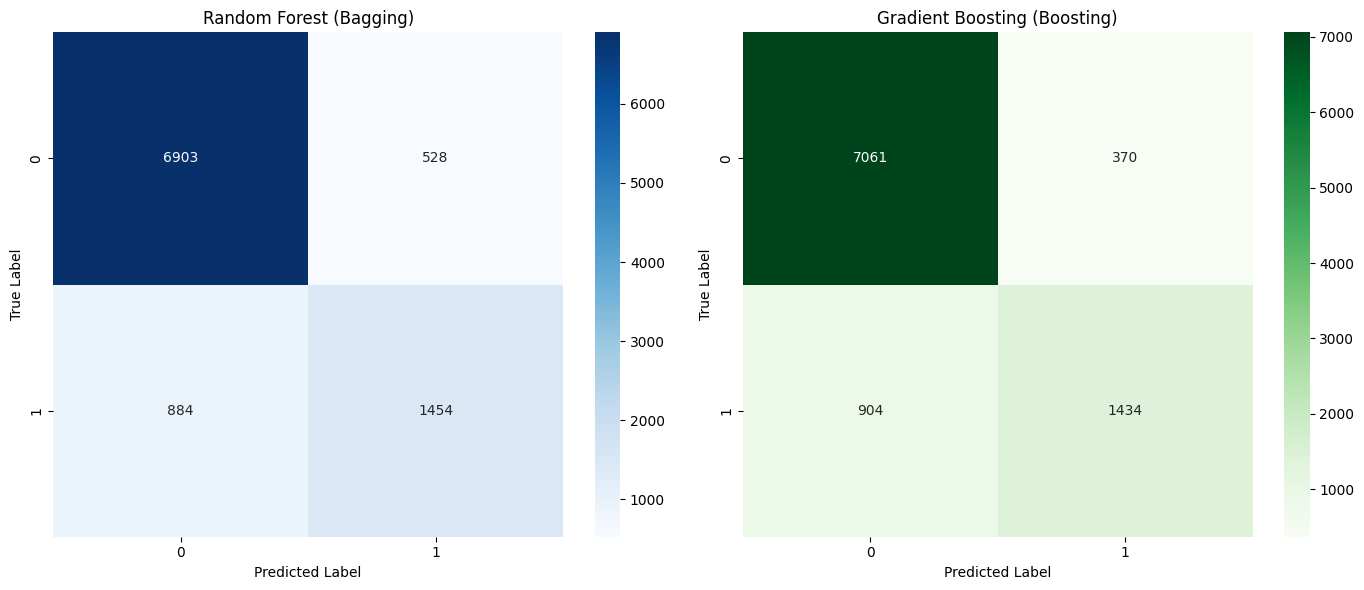

In [1]:
# === 1. Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# === 2. Load & Clean Dataset ===
df = pd.read_csv("/content/income.csv")  # Ganti path jika perlu
df['income'] = df['income'].str.replace(".", "", regex=False)  # hapus titik dari target

# Isi nilai null dengan modus (untuk kategori)
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# === 3. One-Hot Encoding Kategori ===
categorical_cols = df.select_dtypes(include='object').columns.drop('income')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# === 4. Fitur dan Target ===
X = df_encoded.drop(columns='income')
y = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

# === 5. Split Data Training dan Testing ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 6. Normalisasi Data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Model Bagging: Random Forest ===
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# === 8. Model Boosting: Gradient Boosting ===
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# === 9. Evaluasi Model ===
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n=== {name} ===")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"AUC: {auc:.4f}")
    return auc

rf_auc = evaluate_model("Random Forest (Bagging)", y_test, rf_pred, rf_proba)
gb_auc = evaluate_model("Gradient Boosting (Boosting)", y_test, gb_pred, gb_proba)

# === 10. ROC Curve ===
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_proba)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# === 11. Confusion Matrix ===
rf_cm = confusion_matrix(y_test, rf_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Random Forest (Bagging)")
axs[0].set_xlabel("Predicted Label")
axs[0].set_ylabel("True Label")

sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Gradient Boosting (Boosting)")
axs[1].set_xlabel("Predicted Label")
axs[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()
